In [1]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Feature Selection and Scaling
In this step, I'll:

1.   Check for features that are irrelevant or redundant.
2.   Use correlation analysis and feature importance to select useful features.
3.  Scale the features using StandardScaler to ensure uniformity for algorithms like SVM and Neural Networks.





In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset (already uploaded)
df = pd.read_csv('diabetes.csv')


#Check Feature Correlations with Target
I’ll use a heatmap to see which features are correlated with the outcome (diabetes presence: 0 or 1).

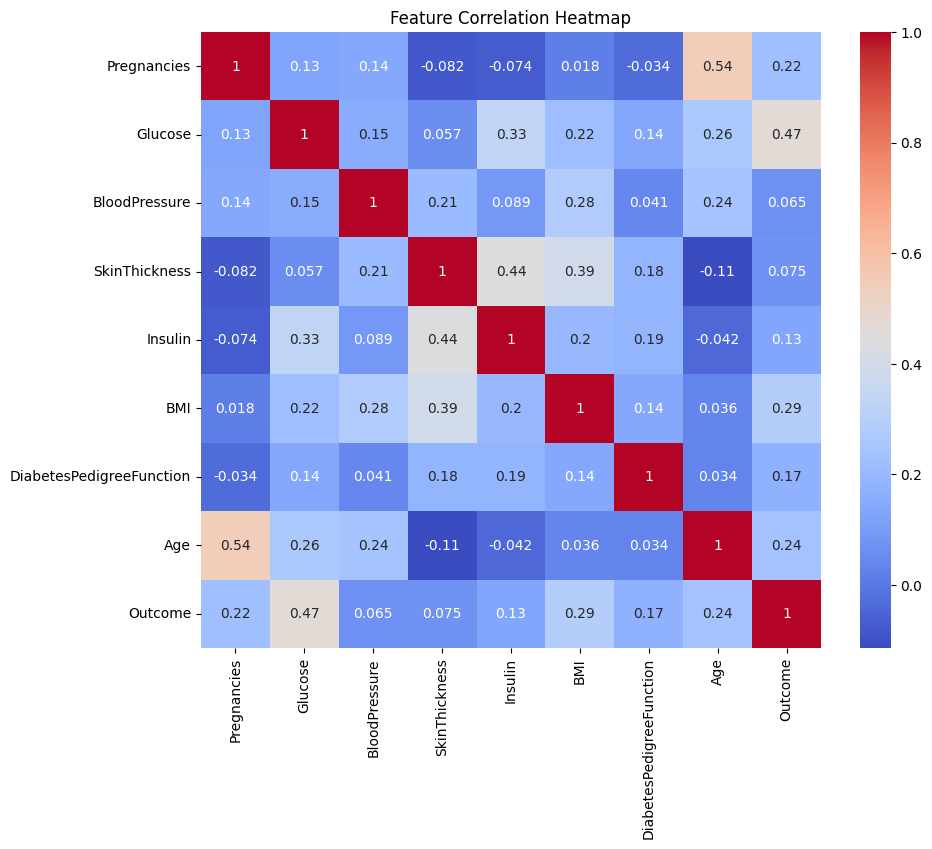

In [4]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


#Apply SelectKBest for Statistical Feature Selection
I’ll now use the SelectKBest method with f_classif (ANOVA F-test) to find the top features that contribute the most to predicting diabetes.

In [5]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Select top 8 features using f_classif
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Create DataFrame of scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

# Display scores
feature_scores


,Feature,Score
1,Glucose,213.161752
5,BMI,71.772072
7,Age,46.140611
0,Pregnancies,39.670227
6,DiabetesPedigreeFunction,23.871300
4,Insulin,13.281108
3,SkinThickness,4.304381
2,BloodPressure,3.256950


#Feature Scaling with StandardScaler
Some models (like SVM and Neural Networks) perform better when all features are on the same scale.

In [6]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Preview scaled features
X_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


#Import Required Libraries for Modeling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve, auc


#Split Dataset: Training and Testing

In [8]:
# Use scaled features from Step 2
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


#Define and Train Models

In [9]:
# Initialize models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(max_iter=500, random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Gradient Boosting trained successfully.
SVM trained successfully.
Neural Network trained successfully.


#Evaluate Models

In [10]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    print(f"\n{name} Performance:")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(classification_report(y_test, y_pred))



Gradient Boosting Performance:
F1 Score: 0.6275
AUC-ROC: 0.8394
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


SVM Performance:
F1 Score: 0.6286
AUC-ROC: 0.7933
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


Neural Network Performance:
F1 Score: 0.5686
AUC-ROC: 0.7930
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.54      0.57        54

    

#Plot ROC Curves for Comparison

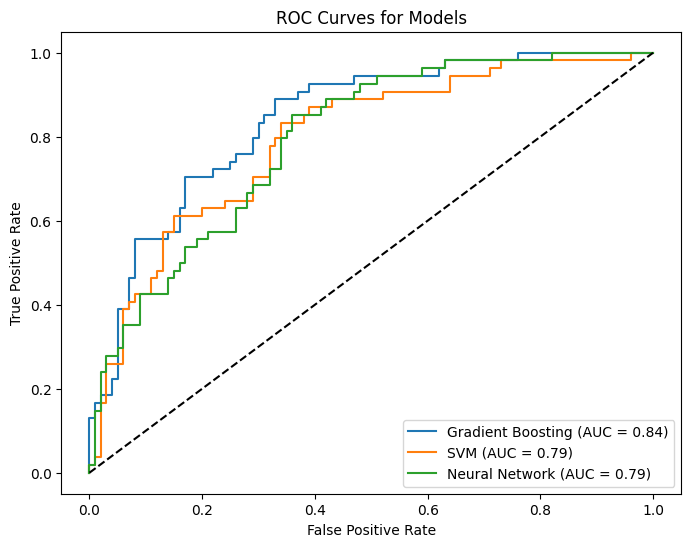

In [12]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)  # Calculate AUC for this model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.show()


#Actionable Insights for Healthcare Professionals

##1. Feature Importance Interpretation
For models like Gradient Boosting, we can extract feature importance to see which factors contribute most to diabetes risk.

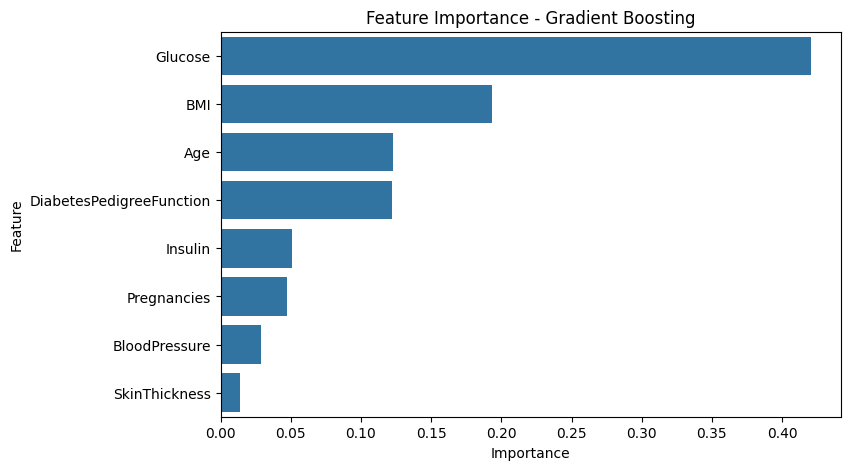

In [13]:
# Feature importance from Gradient Boosting
gb_model = models['Gradient Boosting']

importances = gb_model.feature_importances_
features = X.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance - Gradient Boosting')
plt.show()


##2. Key Findings
Top risk factors: Highlight the features with highest importance (e.g., glucose level, BMI, age).

Early warning: For example, consistently high glucose or BMI values indicate increased diabetes risk.

Preventive advice: Encourage regular monitoring of these key metrics, lifestyle changes, or early screening.



##3. Using Model Predictions for Screening
Your model can flag high-risk patients based on their predicted probabilities.

Healthcare workers can prioritize follow-up tests or preventive interventions for these flagged cases.

This reduces missed diagnoses and focuses resources effectively.



##4. Limitations and Cautions
Models rely on quality and completeness of input data.

Not a replacement for clinical judgment — always consider alongside medical history and tests.

Ethical use: Avoid discrimination or bias in automated predictions.

## Actionable Insights for Healthcare Professionals

- **Top Predictors:** Glucose level, BMI, Age, Insulin levels are significant indicators of diabetes risk.
- **Screening Priorities:** Patients with elevated risk scores should receive timely follow-up for confirmatory tests.
- **Preventive Measures:** Lifestyle interventions focusing on diet, exercise, and weight management are crucial for at-risk individuals.
- **Model Use:** Acts as a decision-support tool to prioritize patient care, not to replace medical expertise.
- **Data Quality:** Continuous updating of patient data will improve model reliability over time.
